In [3]:
import numpy as np

# A1a: Summation Unit
def summation_unit(weights, inputs):
    return np.dot(weights, inputs)

# A1b: Activation Units
def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    return np.tanh(x)

def relu_activation(x):
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    return x if x > 0 else alpha * x

# A1c: Comparator Unit for Error Calculation
def calculate_error(target, output):
    return target - output


In [13]:
import numpy as np

# Define sample inputs
weights = np.array([0.5, -0.2, 0.3])  # Example weights
inputs = np.array([1.0, 0.5, -1.5])   # Example inputs
target = 1                         # Example target value

# A1a: Summation Unit
summation_result = summation_unit(weights, inputs)
print(f"Summation Result: {summation_result}")

# A1b: Activation Units
# Using different activation functions
step_result = step_activation(summation_result)
bipolar_step_result = bipolar_step_activation(summation_result)
sigmoid_result = sigmoid_activation(summation_result)
tanh_result = tanh_activation(summation_result)
relu_result = relu_activation(summation_result)
leaky_relu_result = leaky_relu_activation(summation_result, alpha=0.01)

print(f"Step Activation Result: {step_result}")
print(f"Bipolar Step Activation Result: {bipolar_step_result}")
print(f"Sigmoid Activation Result: {sigmoid_result}")
print(f"Tanh Activation Result: {tanh_result}")
print(f"ReLU Activation Result: {relu_result}")
print(f"Leaky ReLU Activation Result: {leaky_relu_result}")

# A1c: Comparator Unit for Error Calculation
# Choose one of the activation results to compare
output = sigmoid_result  # For example, using sigmoid activation output
error = calculate_error(target, output)
print(f"Error: {error}")


Summation Result: -0.04999999999999993
Step Activation Result: 0
Bipolar Step Activation Result: -1
Sigmoid Activation Result: 0.48750260351578967
Tanh Activation Result: -0.0499583749578799
ReLU Activation Result: 0
Leaky ReLU Activation Result: -0.0004999999999999994
Error: 0.5124973964842103


In [4]:
import matplotlib.pyplot as plt

# A2: Perceptron with step activation for AND gate
def perceptron_and_gate(weights, learning_rate=0.05, epochs=1000, threshold=0.002):
    # AND gate data
    inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # bias included
    targets = np.array([0, 0, 0, 1])
    
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = summation_unit(weights, inputs[i])
            output = step_activation(weighted_sum)
            error = calculate_error(targets[i], output)
            total_error += error**2
            
            # Update weights using perceptron rule
            weights += learning_rate * error * inputs[i]
        
        errors.append(total_error)
        
        if total_error <= threshold:
            break
    
    # Plot epochs vs error
    plt.plot(errors)
    plt.xlabel('Epochs')
    plt.ylabel('Sum Squared Error')
    plt.title('Error vs Epochs for AND Gate')
    plt.show()

    return weights, epoch


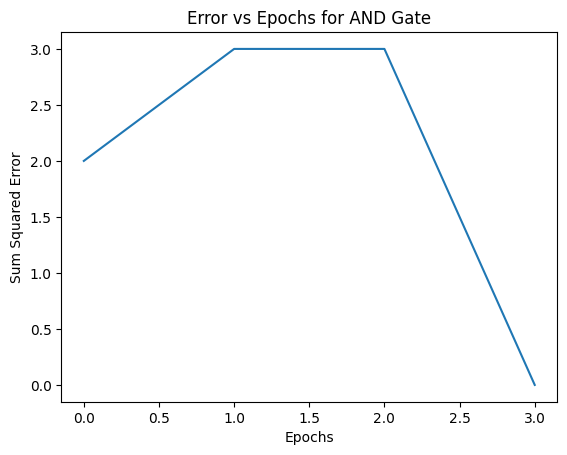

Final Weights: [-0.1   0.1   0.05]
Epochs Trained: 3


In [14]:
# Initialize weights for the perceptron
initial_weights = np.array([0.0, 0.0, 0.0])  # One weight for each input (including bias)

# Train the perceptron and get results
final_weights, epochs_trained = perceptron_and_gate(initial_weights)

print(f"Final Weights: {final_weights}")
print(f"Epochs Trained: {epochs_trained}")

In [30]:
# A3: Using different activation functions
def perceptron_with_activation(weights, inputs, targets, activation_func, learning_rate=0.05, epochs=1000, threshold=0.002):
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = summation_unit(weights, inputs[i])
            output = activation_func(weighted_sum)
            error = calculate_error(targets[i], output)
            total_error += error**2
            
            # Update weights
            weights += learning_rate * error * inputs[i]
        
        errors.append(total_error)
        
        if total_error <= threshold:
            break
    
    return weights, epoch, errors


In [31]:
weights = np.array([0.0, 0.0])
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])  # Example for AND gate

# Choose activation function
activation_func = sigmoid  # Can also use step_function or relu

# Train perceptron
trained_weights, num_epochs, error_history = perceptron_with_activation(weights, inputs, targets, activation_func)

print(f"Trained weights: {trained_weights}")
print(f"Number of epochs: {num_epochs}")
print(f"Error history: {error_history}")

NameError: name 'sigmoid' is not defined

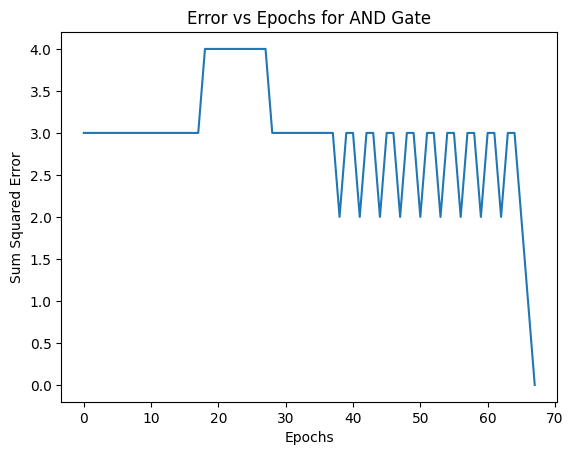

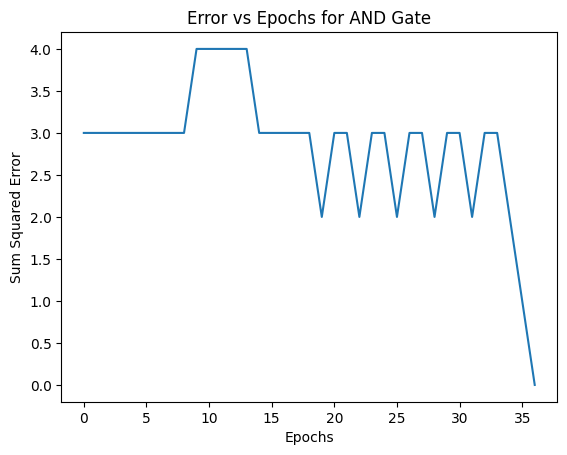

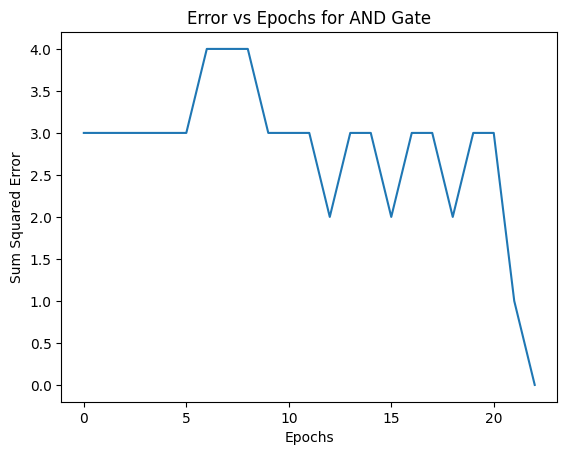

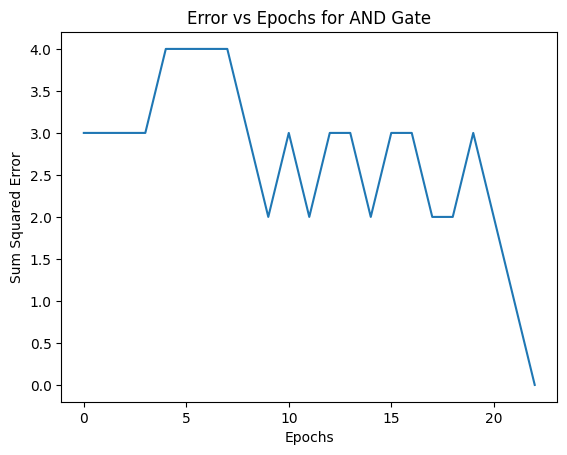

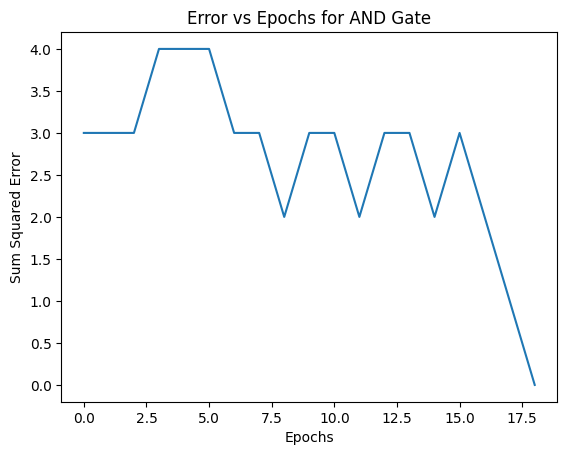

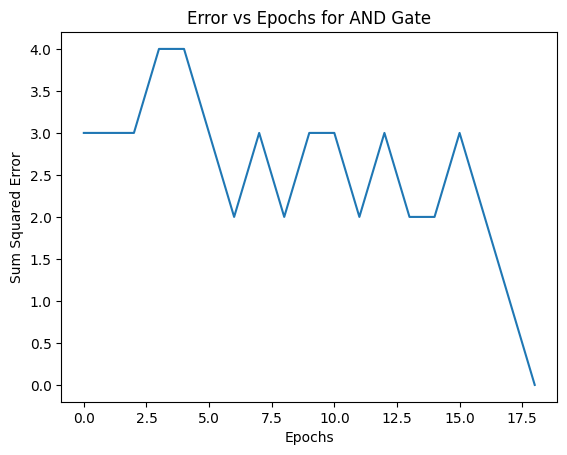

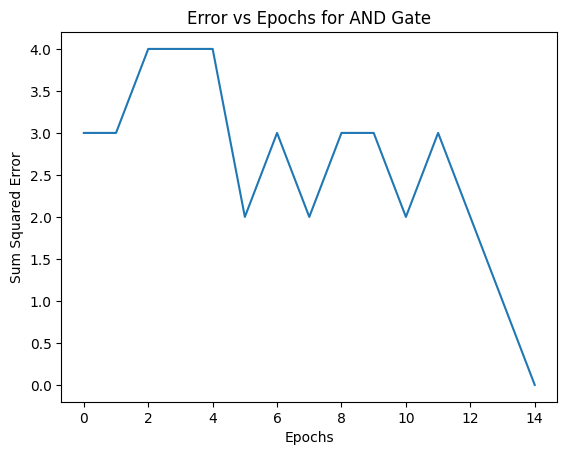

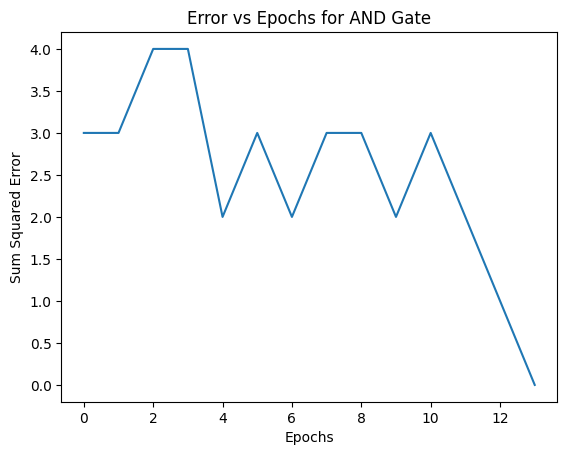

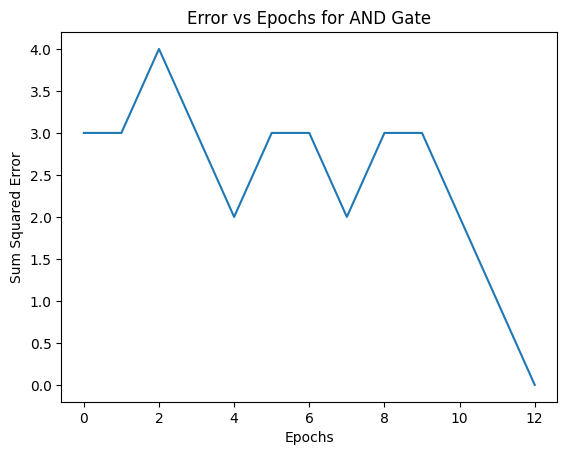

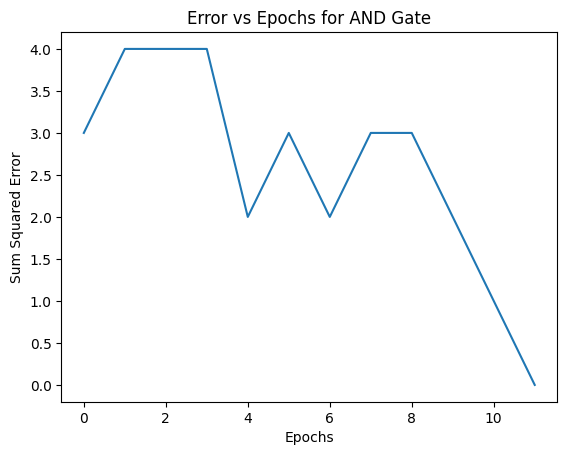

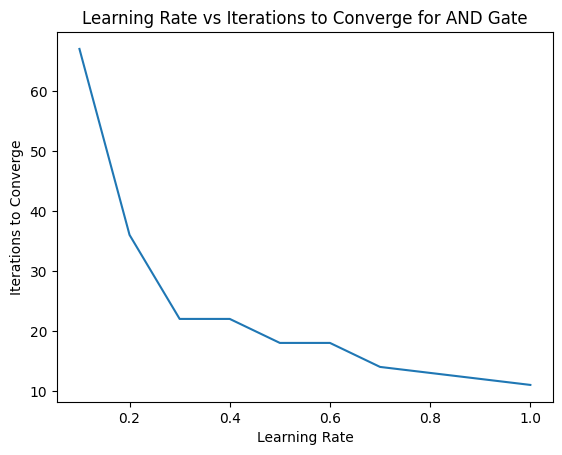

In [6]:
# A4: Varying the learning rate
learning_rates = [0.1 * i for i in range(1, 11)]
iterations_for_convergence = []

for lr in learning_rates:
    weights = np.array([10, 0.2, -0.75])  # initial weights
    _, epoch = perceptron_and_gate(weights, learning_rate=lr)
    iterations_for_convergence.append(epoch)

# Plot learning rate vs iterations to converge
plt.plot(learning_rates, iterations_for_convergence)
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Learning Rate vs Iterations to Converge for AND Gate')
plt.show()


In [7]:
# A5: Perceptron for XOR Gate Logic
def perceptron_xor_gate(weights, learning_rate=0.05, epochs=1000, threshold=0.002):
    # XOR gate data
    inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # bias included
    targets = np.array([0, 1, 1, 0])
    
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = summation_unit(weights, inputs[i])
            output = step_activation(weighted_sum)
            error = calculate_error(targets[i], output)
            total_error += error**2
            
            # Update weights
            weights += learning_rate * error * inputs[i]
        
        errors.append(total_error)
        
        if total_error <= threshold:
            break
    
    plt.plot(errors)
    plt.xlabel('Epochs')
    plt.ylabel('Sum Squared Error')
    plt.title('Error vs Epochs for XOR Gate')
    plt.show()

    return weights, epoch


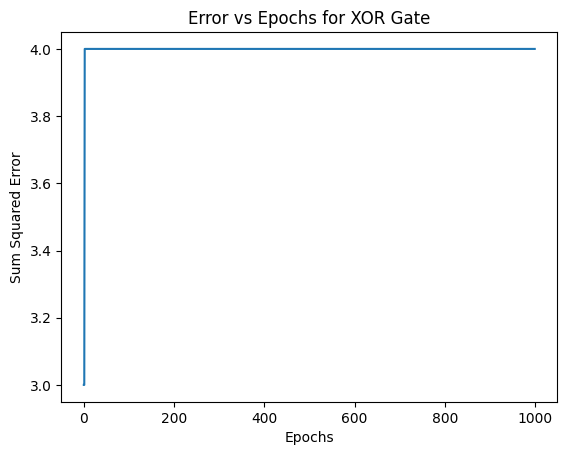

Trained weights: [ 0.   -0.05  0.  ]
Number of epochs: 999


In [18]:
initial_weights = np.array([0.0, 0.0, 0.0])
    
    # Train perceptron
trained_weights, num_epochs = perceptron_xor_gate(initial_weights)

print(f"Trained weights: {trained_weights}")
print(f"Number of epochs: {num_epochs}")

In [8]:
# A6: Perceptron to classify customer transactions as high or low value
def perceptron_customer_data(weights, learning_rate=0.05, epochs=1000, threshold=0.002):
    # Customer data input (Candies, Mangoes, Milk Packets)
    inputs = np.array([[1, 20, 6, 2], [1, 16, 3, 6], [1, 27, 6, 2], [1, 19, 1, 2], 
                       [1, 24, 4, 2], [1, 22, 1, 5], [1, 15, 4, 2], [1, 18, 4, 2], 
                       [1, 21, 1, 4], [1, 16, 2, 4]])  # bias included
    # High Value Transactions (1 = Yes, 0 = No)
    targets = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
    
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = summation_unit(weights, inputs[i])
            output = sigmoid_activation(weighted_sum)
            error = calculate_error(targets[i], output)
            total_error += error**2
            
            # Update weights
            weights += learning_rate * error * inputs[i]
        
        errors.append(total_error)
        
        if total_error <= threshold:
            break
    
    plt.plot(errors)
    plt.xlabel('Epochs')
    plt.ylabel('Sum Squared Error')
    plt.title('Error vs Epochs for Customer Data Classification')
    plt.show()

    return weights, epoch


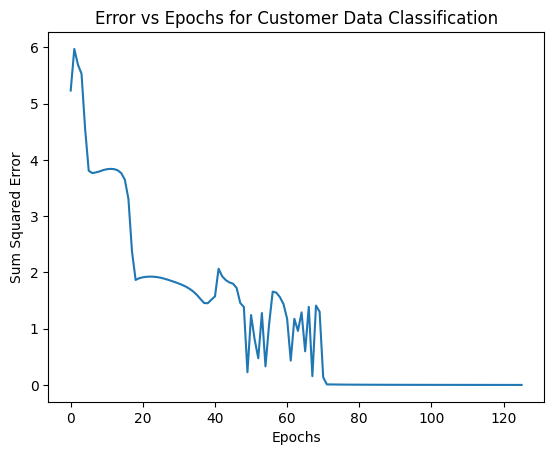

Trained weights: [-0.19898894 -1.2758157   8.6976753  -0.13253519]
Number of epochs: 125


In [19]:
initial_weights = np.array([0.0, 0.0, 0.0, 0.0])

# Train perceptron
trained_weights, num_epochs = perceptron_customer_data(initial_weights)

print(f"Trained weights: {trained_weights}")
print(f"Number of epochs: {num_epochs}")

In [20]:
# A7: Using matrix pseudo-inverse for comparison
def pseudo_inverse_solution(inputs, targets):
    return np.dot(np.linalg.pinv(inputs), targets)

# Compare the perceptron learning to pseudo-inverse
inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # AND gate data
targets = np.array([0, 0, 0, 1])

pseudo_inverse_weights = pseudo_inverse_solution(inputs, targets)
print("Weights from Pseudo-Inverse Method:", pseudo_inverse_weights)


Weights from Pseudo-Inverse Method: [-0.25  0.5   0.5 ]


In [10]:

# A8: Perceptron using backpropagation for AND Gate
def backpropagation_perceptron_and_gate(weights, learning_rate=0.05, epochs=1000, threshold=0.002):
    # AND gate data
    inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # bias included
    targets = np.array([0, 0, 0, 1])
    
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = summation_unit(weights, inputs[i])
            output = sigmoid_activation(weighted_sum)  # Using Sigmoid for Backpropagation
            error = calculate_error(targets[i], output)
            total_error += error**2
            
            # Backpropagation weight update
            gradient = error * output * (1 - output)  # derivative of sigmoid
            weights += learning_rate * gradient * inputs[i]
        
        errors.append(total_error)
        
        if total_error <= threshold:
            break
    
    plt.plot(errors)
    plt.xlabel('Epochs')
    plt.ylabel('Sum Squared Error')
    plt.title('Error vs Epochs for Backpropagation (AND Gate)')
    plt.show()

    return weights, epoch


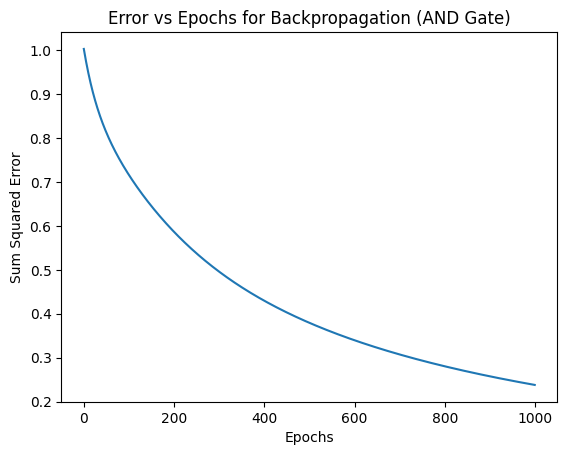

Trained weights: [-2.88176381  1.82093142  1.81810177]
Number of epochs: 999


In [22]:
initial_weights = np.array([0.0, 0.0, 0.0])

# Train perceptron using backpropagation
trained_weights, num_epochs = backpropagation_perceptron_and_gate(initial_weights)

print(f"Trained weights: {trained_weights}")
print(f"Number of epochs: {num_epochs}")

In [11]:

# A9: Backpropagation for XOR Gate Logic
def backpropagation_perceptron_xor_gate(weights, learning_rate=0.05, epochs=1000, threshold=0.002):
    # XOR gate data
    inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # bias included
    targets = np.array([0, 1, 1, 0])
    
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = summation_unit(weights, inputs[i])
            output = sigmoid_activation(weighted_sum)  # Sigmoid for XOR
            error = calculate_error(targets[i], output)
            total_error += error**2
            
            # Backpropagation weight update
            gradient = error * output * (1 - output)  # derivative of sigmoid
            weights += learning_rate * gradient * inputs[i]
        
        errors.append(total_error)
        
        if total_error <= threshold:
            break
    
    plt.plot(errors)
    plt.xlabel('Epochs')
    plt.ylabel('Sum Squared Error')
    plt.title('Error vs Epochs for Backpropagation (XOR Gate)')
    plt.show()

    return weights, epoch


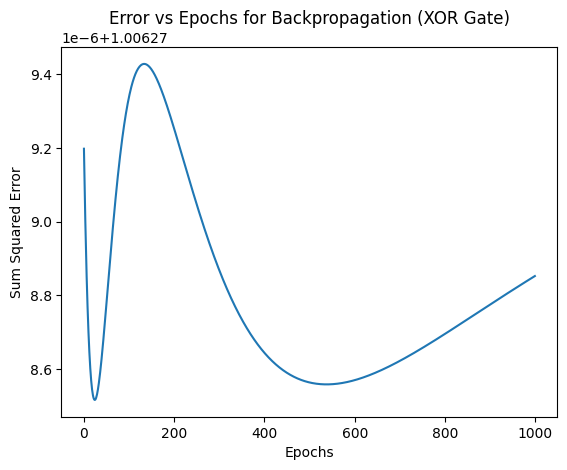

Trained weights: [ 0.00497335 -0.01131148 -0.00531951]
Number of epochs: 999


In [23]:
initial_weights = np.array([0.0, 0.0, 0.0])
    
# Train perceptron using backpropagation
trained_weights, num_epochs = backpropagation_perceptron_xor_gate(initial_weights)

print(f"Trained weights: {trained_weights}")
print(f"Number of epochs: {num_epochs}")


In [28]:
def perceptron_two_outputs(weights, learning_rate=0.05, epochs=1000, threshold=0.002):
    # AND gate with two outputs
    inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])  # Bias included
    targets = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # Two output nodes
    
    num_outputs = targets.shape[1]
    num_inputs = inputs.shape[1]
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            weighted_sum = summation_unit(weights, inputs[i])
            outputs = sigmoid_activation(weighted_sum)  # Sigmoid for output nodes
            error = calculate_error(targets[i], outputs)
            total_error += np.sum(error**2)
            
            # Update weights using backpropagation
            for j in range(num_outputs):
                gradient = sigmoid_derivative(outputs[j]) * error[j]  # Derivative of sigmoid
                weights[j] += learning_rate * gradient * inputs[i]
        
        errors.append(total_error)
        
        if total_error <= threshold:
            break
    
    plt.plot(errors)
    plt.xlabel('Epochs')
    plt.ylabel('Sum Squared Error')
    plt.title('Error vs Epochs for AND Gate with 2 Output Nodes')
    plt.show()

    return weights, epoch

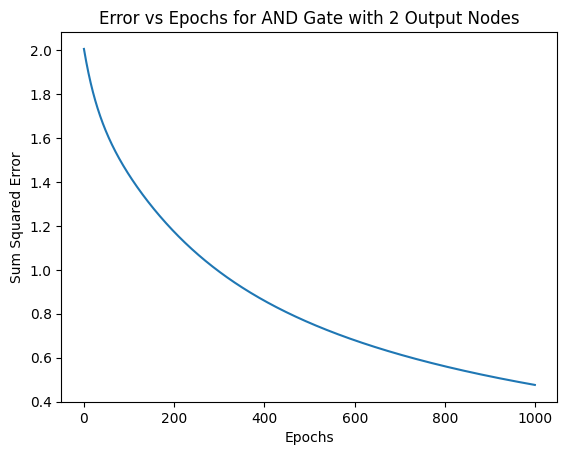

Trained weights: [[ 2.88176381 -1.82093142 -1.81810177]
 [-2.88176381  1.82093142  1.81810177]]
Number of epochs: 999


In [29]:
initial_weights = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])
    
# Train perceptron with two output nodes
trained_weights, num_epochs = perceptron_two_outputs(initial_weights)

print(f"Trained weights: {trained_weights}")
print(f"Number of epochs: {num_epochs}")
